In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("co_properties.csv")
data.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [3]:
data

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,...,4.0,NaN,NaN,7.000000e+08,COP,NaN,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta


In [4]:
"""
Id : Id of property
l1 : Country
l2 : Department
l3 : City
l4 : Zone
l5 : Locality
l6 : Neighborhood
'ad_type':Property, 
'start_date'
'end_date'
'created_on'
'lat'
'lon'
'rooms'
'bedrooms'
'bathrooms',
'surface_total'
'surface_covered'
'price':price
'currency':type of money
'price_period':the period of proce
'title':name 
'description'
'property_type':Apartment,house, farm, etc
'operation_type':Sale, Rent, etc
"""

"\nId : Id of property\nl1 : Country\nl2 : Department\nl3 : City\nl4 : Zone\nl5 : Locality\nl6 : Neighborhood\n'ad_type':Property, \n'start_date'\n'end_date'\n'created_on'\n'lat'\n'lon'\n'rooms'\n'bedrooms'\n'bathrooms',\n'surface_total'\n'surface_covered'\n'price':price\n'currency':type of money\n'price_period':the period of proce\n'title':name \n'description'\n'property_type':Apartment,house, farm, etc\n'operation_type':Sale, Rent, etc\n"

#### Checking the property type

In [5]:
data["property_type"].value_counts()

Apartamento        565404
Casa               220101
Otro               111046
Lote                46369
Local comercial     26389
Oficina             22258
Finca                6725
Depósito             1544
Parqueadero           164
Name: property_type, dtype: int64

#### Apartaments

In [6]:
apartments=data[data["property_type"]=="Apartamento"]
null_values=apartments.isnull().sum()/len(apartments)*100
print(null_values.sort_values())
percetage_50=[]
for column in null_values.index:
    if null_values[column]>50:
        percetage_50.append(column)
apartments=apartments.drop(columns=percetage_50)
apartments= apartments.dropna(how='any')
apartments

id                  0.000000
property_type       0.000000
l2                  0.000000
l1                  0.000000
operation_type      0.000000
end_date            0.000000
start_date          0.000000
ad_type             0.000000
created_on          0.000000
title               0.000531
price               0.039618
currency            0.043686
description         0.055712
l3                  3.999972
bathrooms          13.003445
lat                30.082560
lon                30.082560
bedrooms           57.753571
l4                 68.504821
rooms              79.403931
l5                 82.429378
price_period       89.249811
l6                 93.147378
surface_covered    93.938847
surface_total      96.458285
dtype: float64


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
3326,SpT+hcNb3UQKQiqxW1Ligw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.328000,-76.639000,Colombia,Valle del Cauca,Cali,7.0,980000000.0,COP,"HERMOSO PENTHOUSE EN VENTA, SECTOR PANCE","HERMOSO APARTAMENTO TIPO PENT HOUSE, CON UNA L...",Apartamento,Venta
3552,Gz4dnC8SncBA0th/LCzATQ==,Propiedad,2020-10-07,2020-10-14,2020-10-07,3.449279,-76.495346,Colombia,Valle del Cauca,Cali,1.0,97000000.0,COP,VENTA APARTAMENTO LA BASE,"APARTAMENTO TERCER PISO, UBICADO ZONA NORTE, c...",Apartamento,Venta
3555,4JrUxU9MrPzxGss7uDNALw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.387000,-76.542000,Colombia,Valle del Cauca,Cali,1.0,135000000.0,COP,APARTAMENTO BARRIO SANTA ANITA,APARTAMENTO UBICADO SOBRE LA AUTOPISTA CON GUA...,Apartamento,Venta
3556,oC+59V7yoIfhdH89xyN4kA==,Propiedad,2020-10-07,2020-10-10,2020-10-07,3.399000,-76.529000,Colombia,Valle del Cauca,Cali,1.0,138000000.0,COP,APARTAMENTO BLOQUES DEL LIMONAR,APARTAMENTO REMODELADO CUARTO PISO SIN ASCENSO...,Apartamento,Venta
3557,TjWZarsWuZSz/HkbGpNJYQ==,Propiedad,2020-10-07,2020-12-11,2020-10-07,3.475931,-76.518803,Colombia,Valle del Cauca,Cali,1.0,720000.0,COP,ARRIENDO APARTAESTUDIO LA FLORA,"APARTAESTUDIO EN EDIFICIO CON PARQUEADERO, ubi...",Apartamento,Arriendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2dTHgLrpas4IYRHxffvu5Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.640417,-74.155487,Colombia,Cundinamarca,Bogotá D.C,1.0,800000.0,COP,TORRES DE CASTELLO,<b>TORRES DE CASTELLO</b><br><br>APARTAMENTO S...,Apartamento,Arriendo
999994,WuCAZxlgtkYgoHRAiodCbA==,Propiedad,2021-03-31,2021-09-03,2021-03-31,4.641292,-74.153875,Colombia,Cundinamarca,Bogotá D.C,2.0,350000000.0,COP,Apartamenton venta Zapan de castilla _ wasi362...,Apartamento en piso 6 con amplia iluminación n...,Apartamento,Venta
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo


In [7]:
apartments["created_on"].value_counts()

2021-02-16    5484
2020-07-27    3943
2020-09-25    3812
2021-02-15    3449
2020-08-27    3042
              ... 
2021-06-20      38
2021-07-05      37
2021-07-18      35
2021-07-04      30
2021-06-13      30
Name: created_on, Length: 371, dtype: int64

In [8]:
apartments["operation_type"].value_counts()

Venta                163760
Arriendo             151257
Arriendo temporal       130
Name: operation_type, dtype: int64

In [9]:
apartments["currency"].value_counts()

COP    315141
USD         3
ARS         3
Name: currency, dtype: int64

In [10]:
apartments=apartments[apartments["currency"]=="COP"]
apartments

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
3326,SpT+hcNb3UQKQiqxW1Ligw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.328000,-76.639000,Colombia,Valle del Cauca,Cali,7.0,980000000.0,COP,"HERMOSO PENTHOUSE EN VENTA, SECTOR PANCE","HERMOSO APARTAMENTO TIPO PENT HOUSE, CON UNA L...",Apartamento,Venta
3552,Gz4dnC8SncBA0th/LCzATQ==,Propiedad,2020-10-07,2020-10-14,2020-10-07,3.449279,-76.495346,Colombia,Valle del Cauca,Cali,1.0,97000000.0,COP,VENTA APARTAMENTO LA BASE,"APARTAMENTO TERCER PISO, UBICADO ZONA NORTE, c...",Apartamento,Venta
3555,4JrUxU9MrPzxGss7uDNALw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.387000,-76.542000,Colombia,Valle del Cauca,Cali,1.0,135000000.0,COP,APARTAMENTO BARRIO SANTA ANITA,APARTAMENTO UBICADO SOBRE LA AUTOPISTA CON GUA...,Apartamento,Venta
3556,oC+59V7yoIfhdH89xyN4kA==,Propiedad,2020-10-07,2020-10-10,2020-10-07,3.399000,-76.529000,Colombia,Valle del Cauca,Cali,1.0,138000000.0,COP,APARTAMENTO BLOQUES DEL LIMONAR,APARTAMENTO REMODELADO CUARTO PISO SIN ASCENSO...,Apartamento,Venta
3557,TjWZarsWuZSz/HkbGpNJYQ==,Propiedad,2020-10-07,2020-12-11,2020-10-07,3.475931,-76.518803,Colombia,Valle del Cauca,Cali,1.0,720000.0,COP,ARRIENDO APARTAESTUDIO LA FLORA,"APARTAESTUDIO EN EDIFICIO CON PARQUEADERO, ubi...",Apartamento,Arriendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2dTHgLrpas4IYRHxffvu5Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.640417,-74.155487,Colombia,Cundinamarca,Bogotá D.C,1.0,800000.0,COP,TORRES DE CASTELLO,<b>TORRES DE CASTELLO</b><br><br>APARTAMENTO S...,Apartamento,Arriendo
999994,WuCAZxlgtkYgoHRAiodCbA==,Propiedad,2021-03-31,2021-09-03,2021-03-31,4.641292,-74.153875,Colombia,Cundinamarca,Bogotá D.C,2.0,350000000.0,COP,Apartamenton venta Zapan de castilla _ wasi362...,Apartamento en piso 6 con amplia iluminación n...,Apartamento,Venta
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo


In [11]:
cities=apartments["l3"].value_counts()[:10].index.to_list()
cities

['Bogotá D.C',
 'Medellín',
 'Cali',
 'Barranquilla',
 'Manizales',
 'Bucaramanga',
 'Envigado',
 'Floridablanca',
 'Sabaneta',
 'Cúcuta']

In [12]:
apartments = apartments[apartments["l3"].isin(apartments["l3"].value_counts()[:10].index)]
sales_data=apartments[apartments["operation_type"]=="Venta"]
rent_data=apartments[apartments["operation_type"]=="Arriendo"]

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

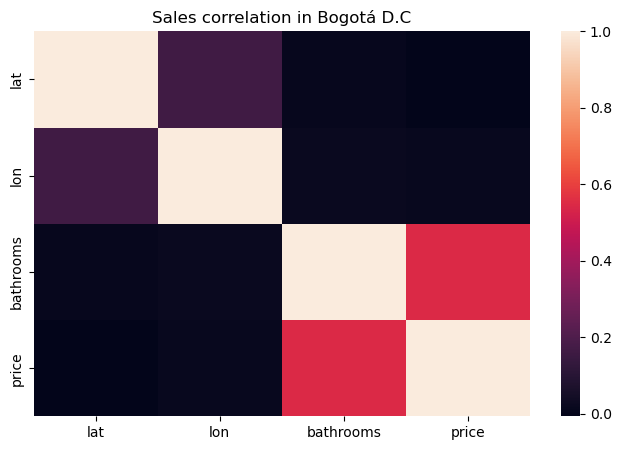

0-2          26766
3-4          15722
5 or more     2279
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


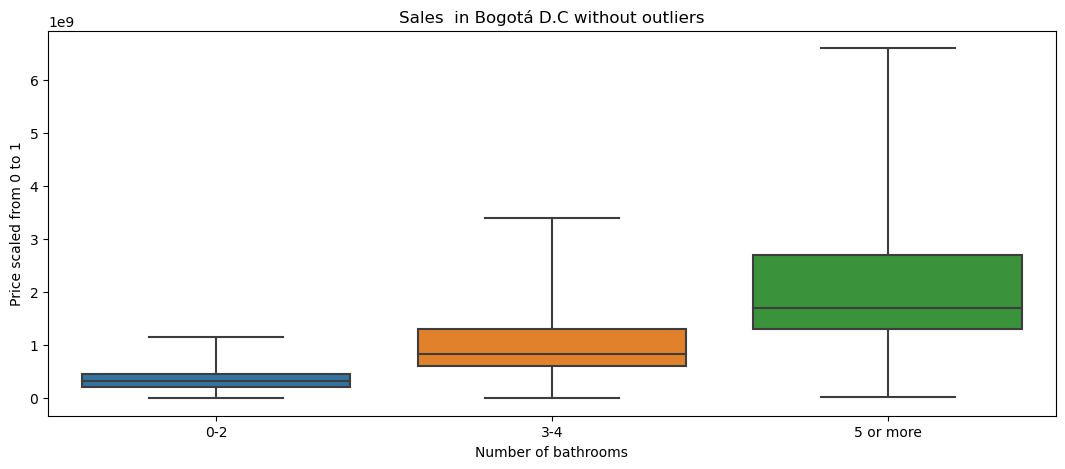

Accuracy using SVM-Linear: 0.7700469064105427
............................................................................................
............................................................................................


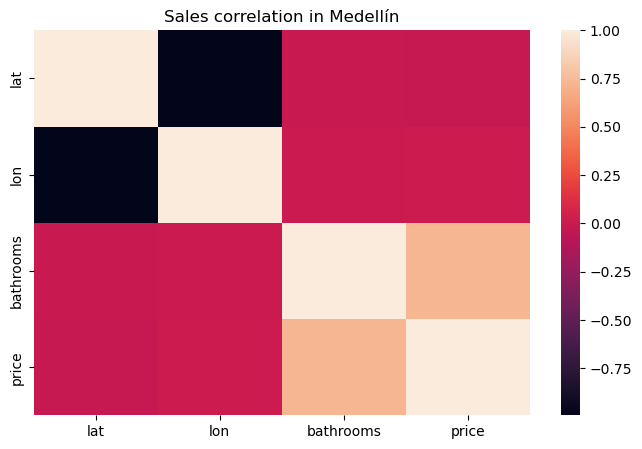

0-2          11309
3-4           5895
5 or more      996
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


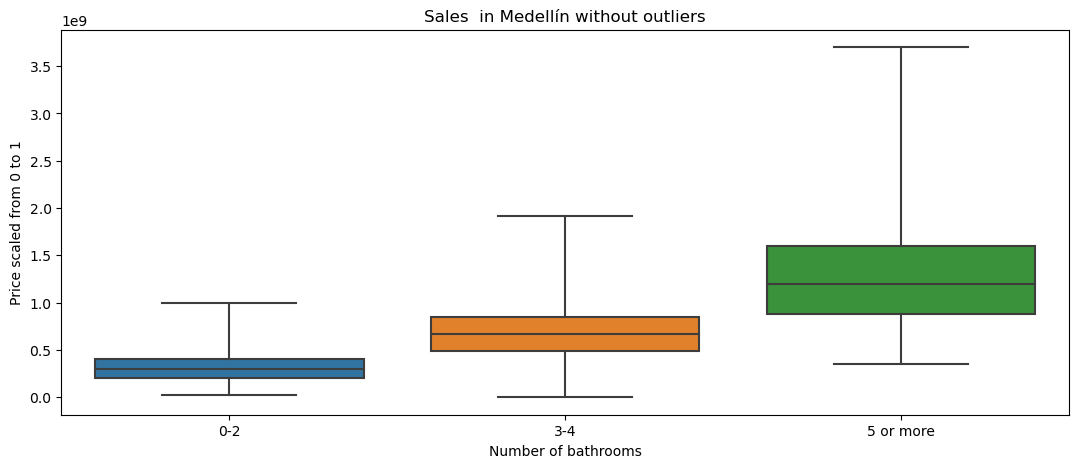

Accuracy using SVM-Linear: 0.7769230769230769
............................................................................................
............................................................................................


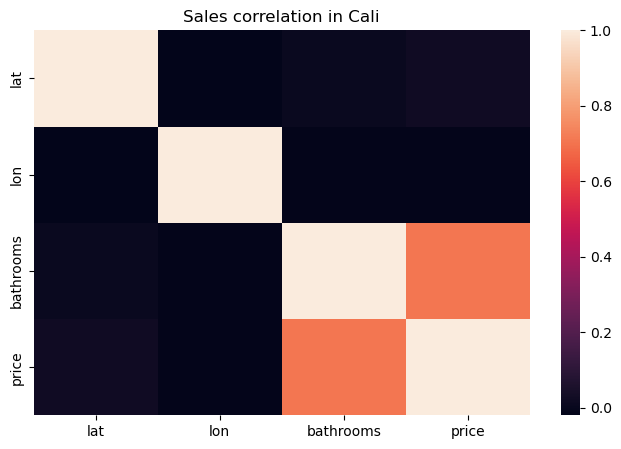

0-2          14806
3-4           7271
5 or more     1067
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


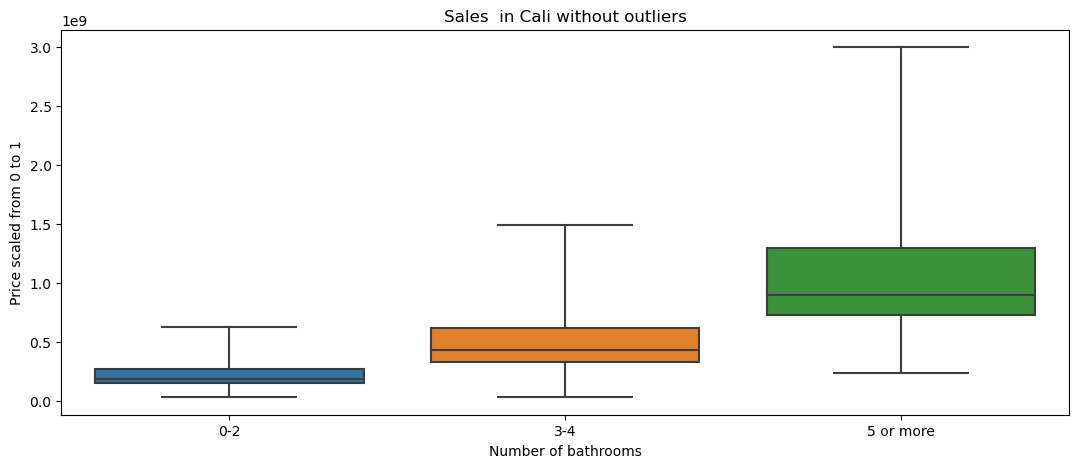

Accuracy using SVM-Linear: 0.7954201771440916
............................................................................................
............................................................................................


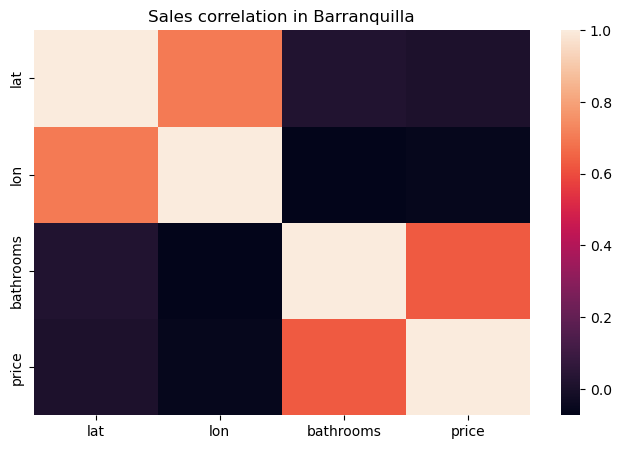

0-2          10966
3-4           6084
5 or more      671
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


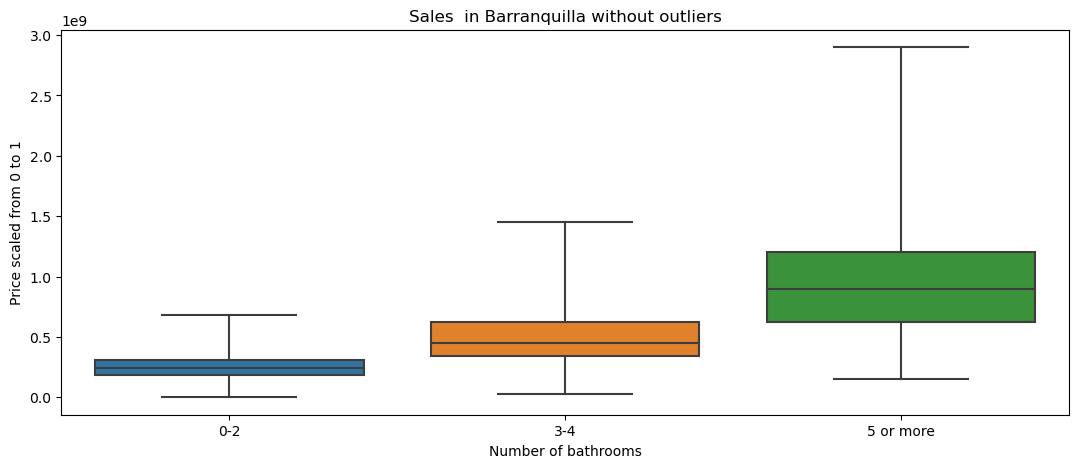

Accuracy using SVM-Linear: 0.7548660084626234
............................................................................................
............................................................................................


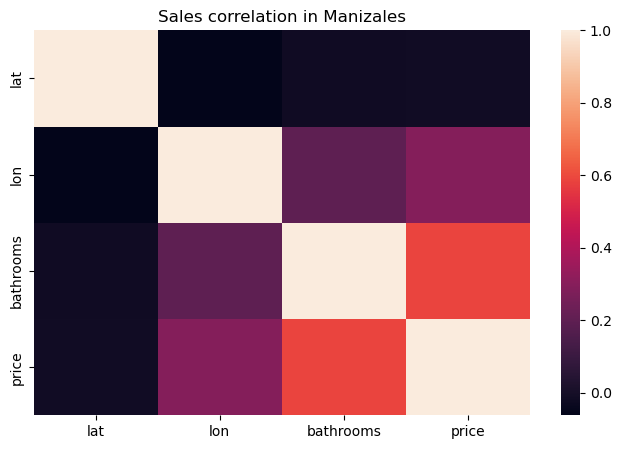

0-2          10273
3-4           1759
5 or more       55
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


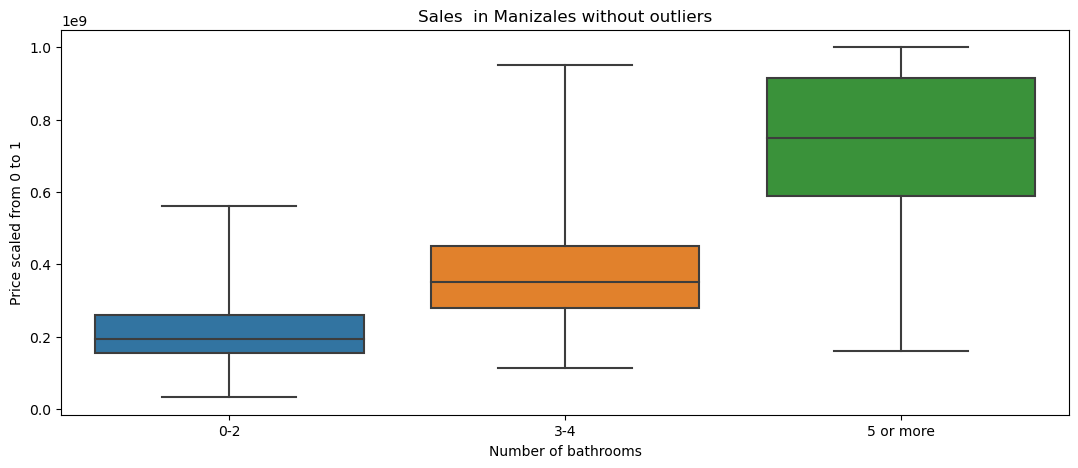

Accuracy using SVM-Linear: 0.8730355665839536
............................................................................................
............................................................................................


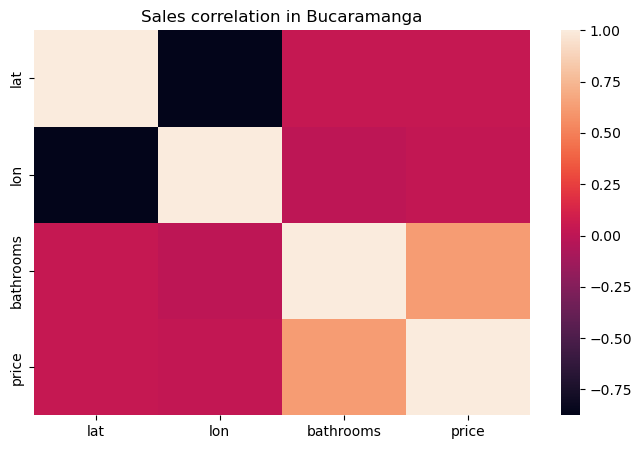

0-2          5081
3-4          1281
5 or more      87
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


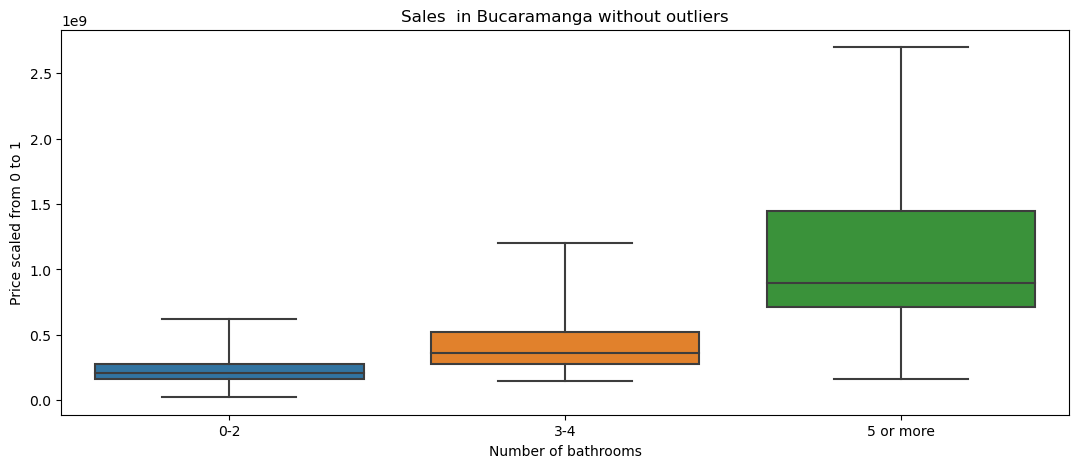

Accuracy using SVM-Linear: 0.8325581395348837
............................................................................................
............................................................................................


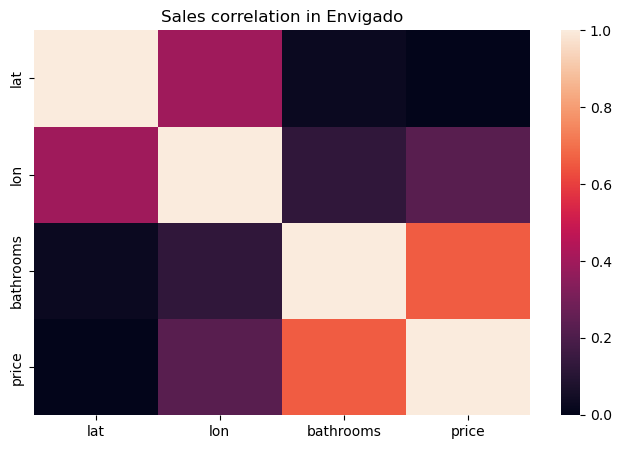

0-2          3154
3-4          1723
5 or more     188
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


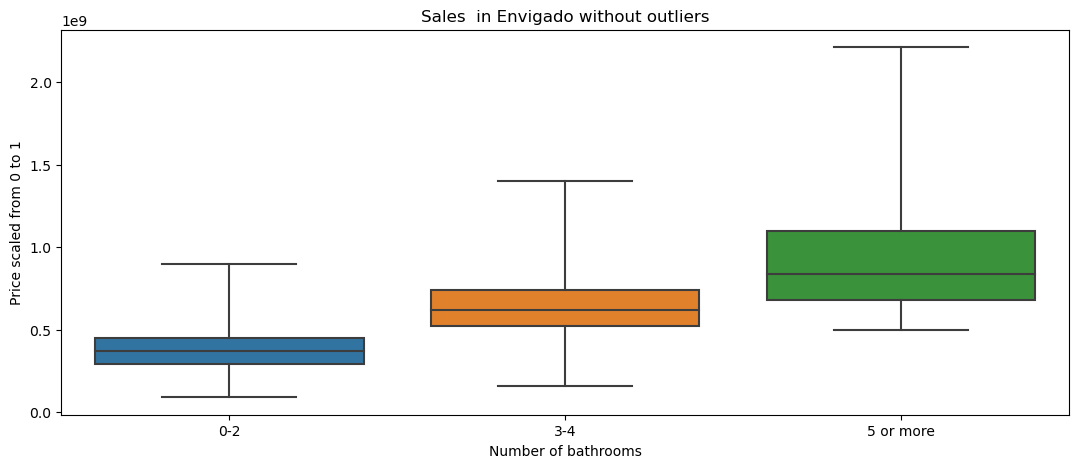

Accuracy using SVM-Linear: 0.8005923000987167
............................................................................................
............................................................................................


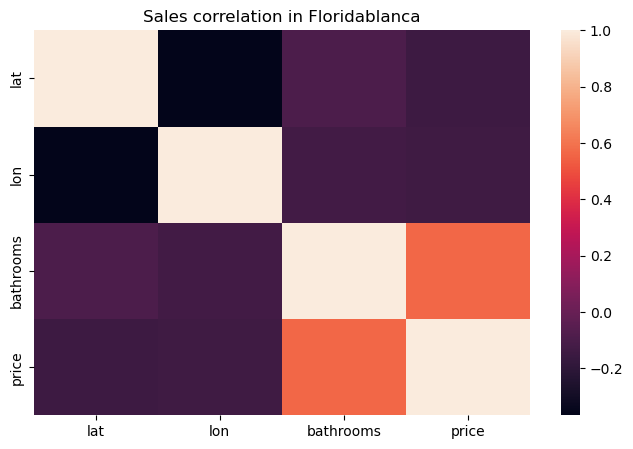

0-2          1767
3-4           292
5 or more       6
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


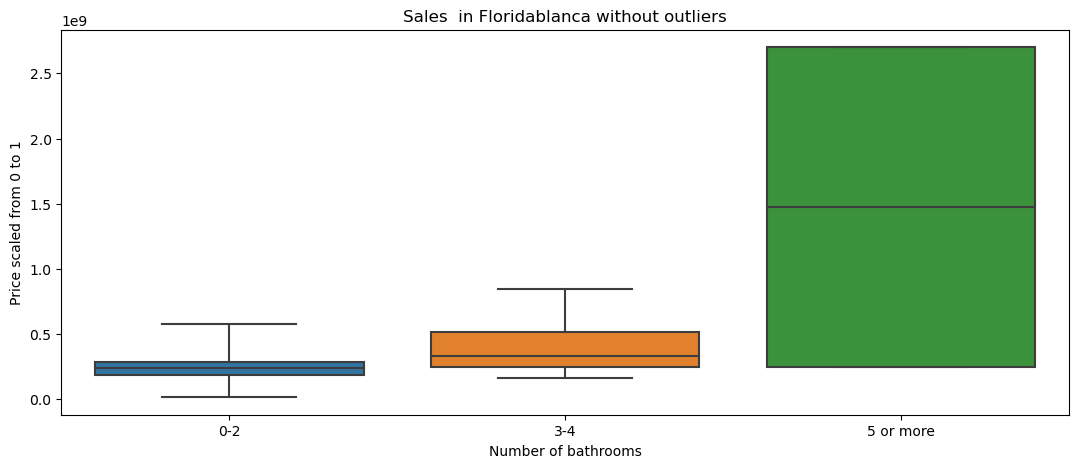

Accuracy using SVM-Linear: 0.8498789346246973
............................................................................................
............................................................................................


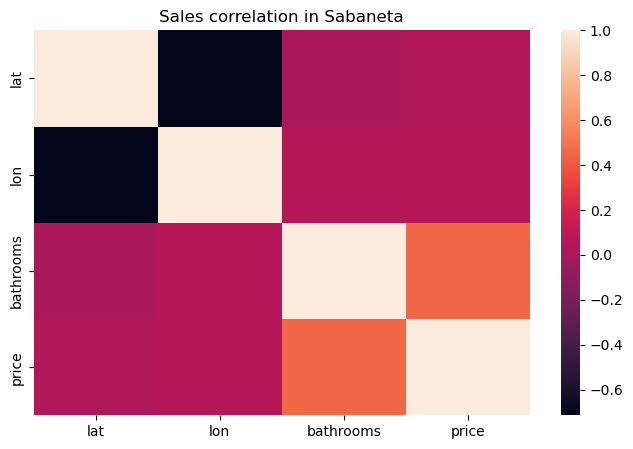

0-2          2156
3-4           303
5 or more      37
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


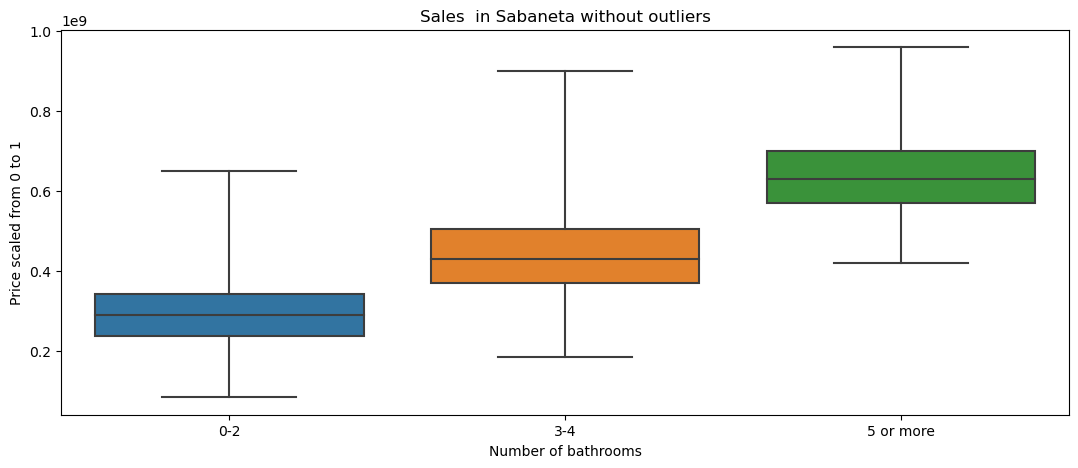

Accuracy using SVM-Linear: 0.86
............................................................................................
............................................................................................


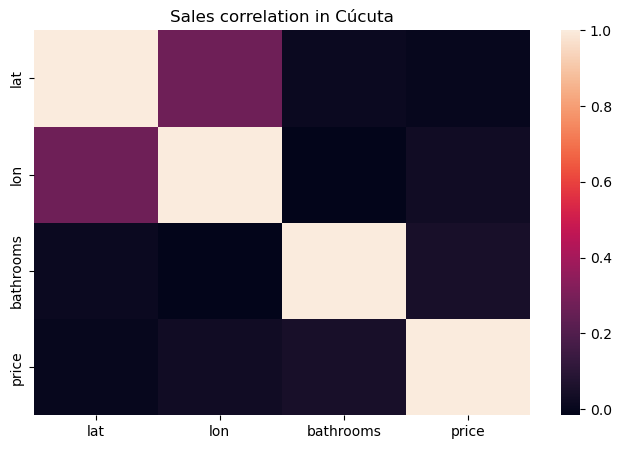

0-2          2255
3-4          1035
5 or more      60
Name: bathroom_range, dtype: int64


C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2726703638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


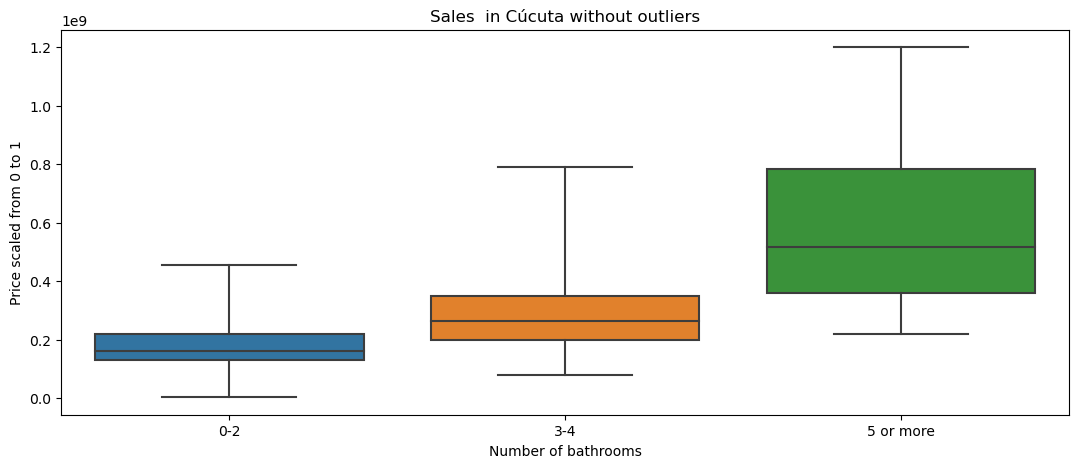

Accuracy using SVM-Linear: 0.6567164179104478
............................................................................................
............................................................................................


In [14]:
for city in cities:
    sales_data_city=sales_data[sales_data["l3"]==city]
    corr=sales_data_city.corr ()
    # plot the heatmap
    plt.rcParams["figure.figsize"] = (8,5)
    plt.title("Sales correlation"+" in "+ city)
    sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
    plt.show()
    X = sales_data_city[["price","lat","lon"]]
    y = sales_data_city["bathrooms"]
    # Define the range bins
    bins = [-0.1, 2.1, 4.1, 10000]
    labels=["0-2","3-4","5 or more"]
    # Create a new column "bathroom_range" and assign it the values of the corresponding bin
    sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)
    y=sales_data_city['bathroom_range']
    # Display the counts of each bin
    print(sales_data_city['bathroom_range'].value_counts()) 
    X=X.values
    y=y.values
    plt.rcParams["figure.figsize"] = (13,5)
    plt.title("Sales " + " in " + city+" without outliers")
    plt.xlabel("Number of bathrooms")
    plt.ylabel("Price scaled from 0 to 1")
    sns.boxplot(x=y, y=X[:,0],whis=3, sym='')
    plt.show()
    X = min_max_scaler.fit_transform(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train a SVM model
    svm = SVC(kernel='rbf')
    svm.fit(X_train, y_train)

    # Predict on the testing set and calculate the accuracy
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    """
    plt.rcParams["figure.figsize"] = (13,5)
    plt.title("Sales " + " in " + city+" without outliers")
    plt.xlabel("Number of bathrooms")
    plt.ylabel("Price scaled from 0 to 1")
    sns.boxplot(x=y, y=X[:,0],whis=3, sym='')
    plt.show()
    """
    print("Accuracy using SVM-Linear:", accuracy)
    print("............................................................................................")
    print("............................................................................................")

#### Farms

In [15]:
farms=data[data["property_type"]=="Finca"]
farms=farms[(farms["operation_type"]=="Venta") & (~farms["bathrooms"].isnull()) & (~farms["price"].isnull())]
(farms["bathrooms"].isnull())

3286      False
3287      False
7209      False
7661      False
9163      False
          ...  
997556    False
997558    False
997796    False
997802    False
997805    False
Name: bathrooms, Length: 2111, dtype: bool

In [16]:
farms

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
3286,oCZMU+Y51zECrC90M9ls6g==,Propiedad,2020-10-07,2020-10-09,2020-10-07,5.633,-73.524,Colombia,Boyacá,Villa de Leyva,...,1.0,45000.0,NaN,1.800000e+09,COP,NaN,Finca En Venta En Villa De Leyva Villa De Leyv...,"VENTA DE FINCA EN REA RURAL VILLA DE LEYVA, F...",Finca,Venta
3287,LBJCGtTUWeqUjPF/VVqelA==,Propiedad,2020-10-07,2020-10-09,2020-10-07,4.646,-74.478,Colombia,Cundinamarca,La Mesa,...,4.0,2000.0,385.0,9.200000e+08,COP,NaN,Finca En Venta En La Mesa La Mesa Cod. VGCS-71...,HERMOSA casa en el condominio campestre LARAPI...,Finca,Venta
7209,iVrQ36bSayGD1NlqWuWsvw==,Propiedad,2020-11-28,2021-01-29,2020-11-28,4.997,-73.899,Colombia,Cundinamarca,Gachancipá,...,2.0,NaN,NaN,1.750000e+10,COP,NaN,Finca En Venta En Gachancipa Gachancip Cod. VR...,ESPECTACULAR FINCA DE 33 FANEGADAS Y CASA DE E...,Finca,Venta
7661,OiL5Tx14YIJ7M1pGKWSHyg==,Propiedad,2020-11-28,2021-02-11,2020-11-28,4.918,-74.097,Colombia,Cundinamarca,Tabio,...,3.0,NaN,172.0,6.300000e+08,COP,NaN,Finca En Venta En Tabio Tabio Cod. VREI18232,MAGNIFICA CASA TRADICIONAL. AREA TOTAL 4.305 M...,Finca,Venta
9163,pJah2qu9GVCZGAgUgmJmaw==,Propiedad,2021-06-03,2021-06-30,2021-06-03,4.897,-74.060,Colombia,Cundinamarca,Chía,...,2.0,NaN,NaN,5.800000e+08,COP,NaN,CASA CAMPESTRE EN VENTA EN CHIA,VENDO CASA CAMPESTRE EN FAGUA PARA ESTRENAR. S...,Finca,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997556,I6zPoVfdYi+ZQoN3aQs5mw==,Propiedad,2021-03-31,2021-05-10,2021-03-31,4.734,-74.341,Colombia,Cundinamarca,Bojacá,...,4.0,NaN,NaN,1.450000e+09,COP,NaN,CASA CAMPESTRE EN VENTA EN BOJACA,Linda casa en un lote es de 670 m2 y esquiner...,Finca,Venta
997558,ItOuIddcccnqaBW8yVDFsw==,Propiedad,2021-03-31,2021-05-10,2021-03-31,4.722,-73.968,Colombia,Cundinamarca,La Calera,...,4.0,NaN,NaN,2.245000e+09,COP,NaN,CASA CAMPESTRE EN VENTA EN LA CALERA,Linda casa campestre en un lote de 1.994 metr...,Finca,Venta
997796,RS65g8L4W0JWnszxjKxfag==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.304,-74.476,Colombia,Cundinamarca,NaN,...,3.0,NaN,NaN,5.000000e+08,COP,NaN,CASA CAMPESTRE EN VENTA EN CHINAUTA,"A pesar de estar dentro del casco urbano, la c...",Finca,Venta
997802,HhBzb/kA6QyxjGIYEOZqlg==,Propiedad,2021-03-31,9999-12-31,2021-03-31,3.364,-76.558,Colombia,Valle del Cauca,Cali,...,2.0,NaN,NaN,6.000000e+08,COP,NaN,CASA CAMPESTRE EN VENTA EN CALI,Vendo exclusiva casa campestre con excelentes ...,Finca,Venta


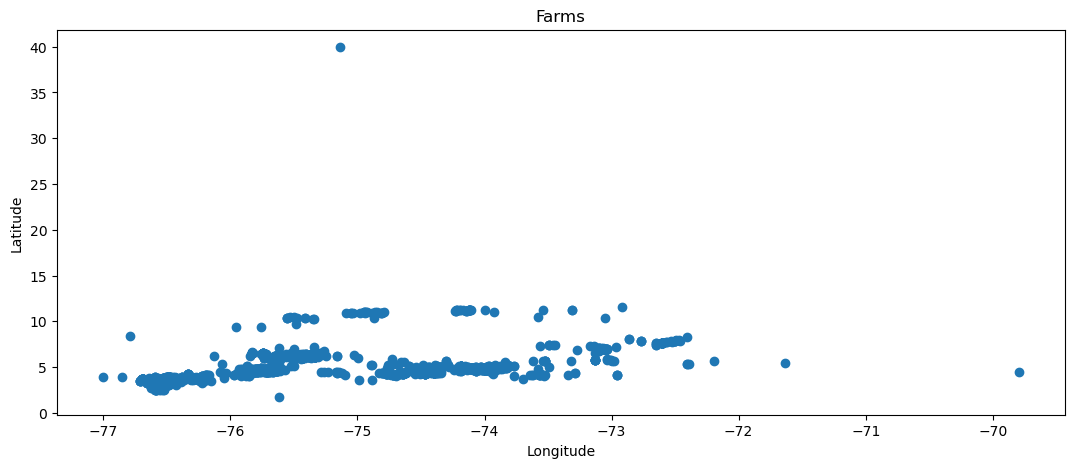

In [17]:
plt.title("Farms")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(farms["lon"],farms["lat"])

In [18]:
farms[farms["lat"]>35]

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
169417,fWh1NRVj7nSa0RKfuuzOdg==,Propiedad,2021-07-27,9999-12-31,2021-07-27,39.943521,-75.140996,Colombia,Cundinamarca,Bogotá D.C,...,2.0,NaN,NaN,160000000.0,COP,NaN,HERMOSA CASA CAMPESTRE EN SAN DIEGO CESAR 02,VENDO CASA CAMPESTRE EN SAN DIEGO CESAR TIENE ...,Finca,Venta


In [19]:
farms=farms[farms["lat"]<35]

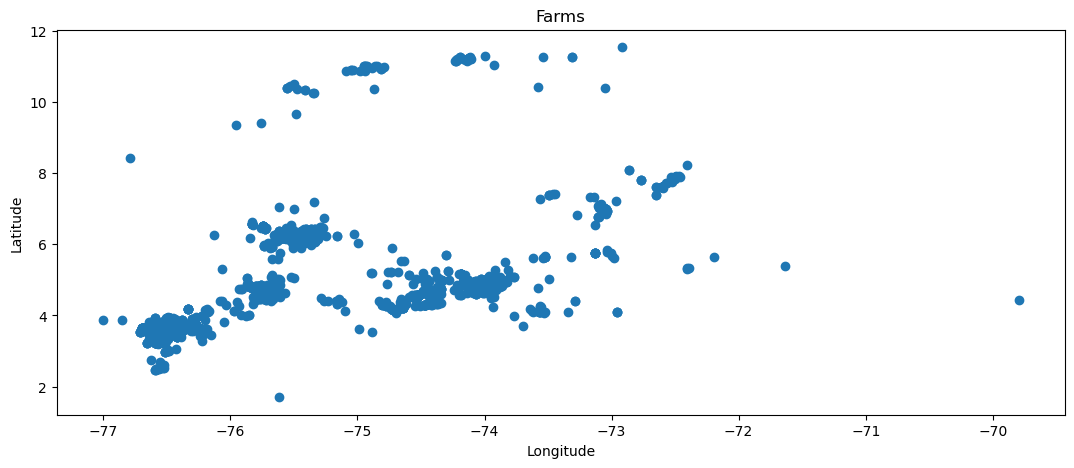

In [20]:
plt.title("Farms")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(farms["lon"],farms["lat"])

C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2845356037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farms["bathrooms_k"]=(farms["bathrooms"]-min(farms["bathrooms"]))/(max(farms["bathrooms"])-min(farms["bathrooms"]))
C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2845356037.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farms["lon_k"]=(farms["lon"]-min(farms["lon"]))/(max(farms["lon"])-min(farms["lon"]))
C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2845356037.py:12: Setti

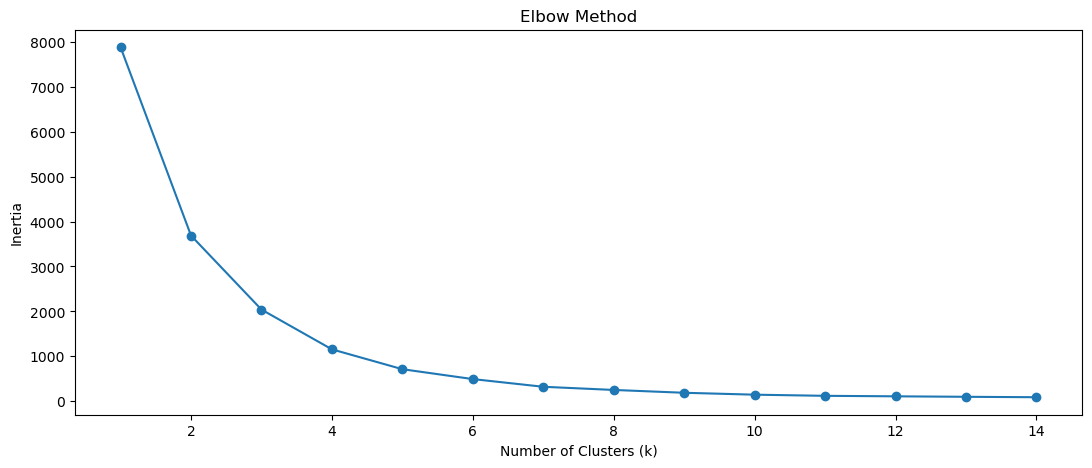

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Create an empty list to store the inertia values for each k
inertias = []

# Define a range of k values to test
k_values = range(1, 15)
farms["bathrooms_k"]=(farms["bathrooms"]-min(farms["bathrooms"]))/(max(farms["bathrooms"])-min(farms["bathrooms"]))
farms["lon_k"]=(farms["lon"]-min(farms["lon"]))/(max(farms["lon"])-min(farms["lon"]))
farms["lat_k"]=(farms["lat"]-min(farms["lat"]))/(max(farms["lat"])-min(farms["lat"]))
# Loop through each k value and fit a KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(farms[["lon_k", "lat_k","bathrooms"]])
    
    # Append the inertia value to the list
    inertias.append(kmeans.inertia_)
    
# Plot the inertia values for each k value
plt.plot(k_values, inertias, "o-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\2539540615.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farms["label_Kmeans"]=labels


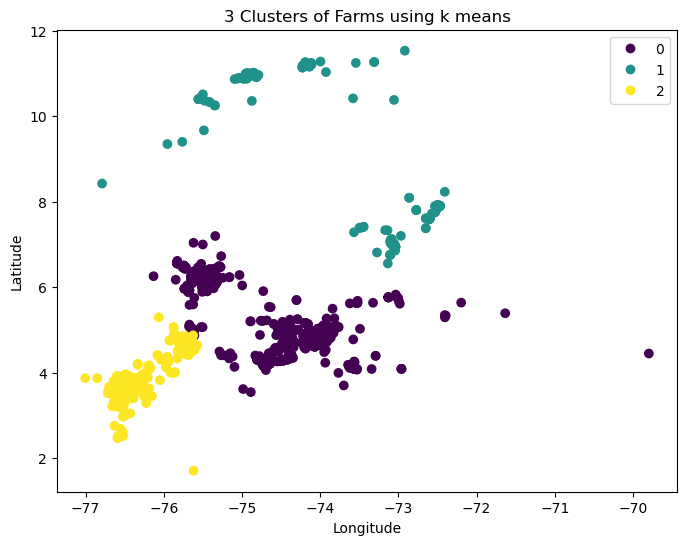

In [22]:
from sklearn.cluster import KMeans

# Filter data to only include farms

# Define the number of clusters to create
n_clusters = 3

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the farm data
kmeans.fit(farms[["lon_k", "lat_k","bathrooms_k"]])

# Get the labels for each farm point
labels = kmeans.labels_
farms["label_Kmeans"]=labels
# Plot the farms with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.title(f"{n_clusters} Clusters of Farms using k means")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sc=plt.scatter(farms["lon"], farms["lat"], c=labels, cmap="viridis")
plt.legend(*sc.legend_elements())
plt.show()

C:\Users\afrincon\AppData\Local\Temp\ipykernel_24128\3639735285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farms["label_Kmeans"]=labels


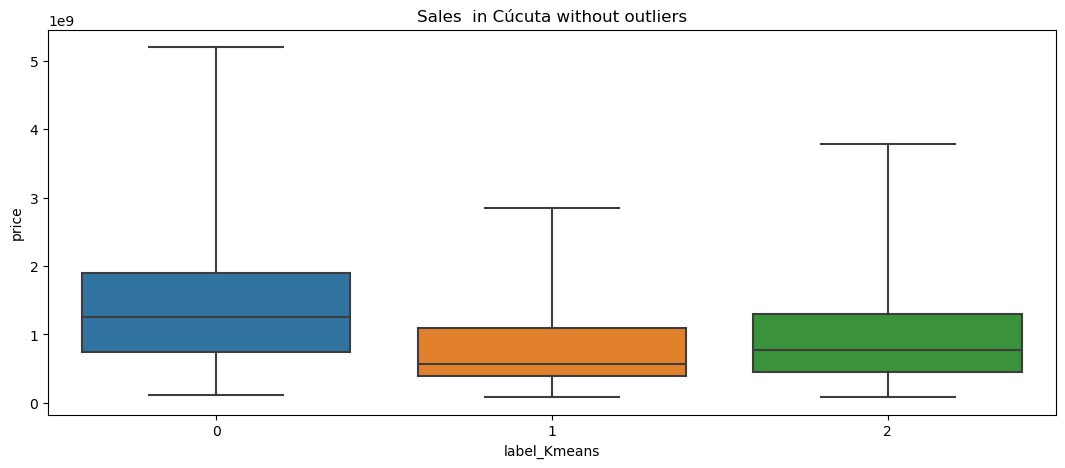

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,currency,price_period,title,description,property_type,operation_type,bathrooms_k,lon_k,lat_k,label_Kmeans
9847,Lv7Hw5q6guXdzQgnqyb5/Q==,Propiedad,2021-06-03,2021-08-09,2021-06-03,6.942000,-73.036000,Colombia,Santander,Piedecuesta,...,COP,NaN,CASA CAMPESTRE EN VENTA EN PIEDECUESTA,Hermosísima casa campestre EN VENTA PARA ESTRE...,Finca,Venta,0.315789,0.550499,0.532794,1
12362,uiRkCcjv2bMjAKrv2bX+gw==,Propiedad,2021-02-12,9999-12-31,2021-02-12,11.005000,-74.949000,Colombia,Atlántico,Puerto Colombia,...,COP,NaN,CASA CAMPESTRE EN VENTA EN PUERTO COLOMBIA,Espectacular casa sector mas turístico del Atl...,Finca,Venta,0.157895,0.285100,0.945818,1
20745,PzAhw8La8PmsZGN7hDOcWA==,Propiedad,2021-06-17,2021-08-04,2021-06-17,6.756000,-73.104000,Colombia,Santander,Los Santos,...,COP,NaN,CASA CAMPESTRE EN VENTA EN LOS SANTOS,Se Vente hermosa Casa Campestre en una Villa C...,Finca,Venta,0.157895,0.541065,0.513887,1
26919,R21HHLGoYgk7BUW0bGNcpw==,Propiedad,2021-02-26,2021-07-13,2021-02-26,10.945000,-74.883000,Colombia,Atlántico,Galapa,...,COP,NaN,Finca En Venta En Galapa Galapa Cod. VFNC101091,Fnca ubicada en el municipio de Galapa detrs d...,Finca,Venta,0.000000,0.294256,0.939719,1
32531,qmVpVGbGp11PJKeG67AUWg==,Propiedad,2021-08-19,9999-12-31,2021-08-19,9.404213,-75.762450,Colombia,Córdoba,NaN,...,COP,NaN,ESPECTACULAR CABAÑA AMOBLADA A POCOS PASOS DEL...,La propiedad cuenta con excelente dotación par...,Finca,Venta,0.157895,0.172246,0.783090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955791,qa/5dhPHSyXGdjtpdKtfHg==,Propiedad,2021-05-11,2021-08-12,2021-05-11,7.807000,-72.770000,Colombia,Norte de Santander,NaN,...,COP,NaN,Finca En Venta En Salazar Laguna Cod. VTON24541,"Finca disponible para la venta, la casa princi...",Finca,Venta,0.052632,0.587403,0.620726,1
966220,5olnz255mfjgauNSDRCwXw==,Propiedad,2021-08-03,9999-12-31,2021-08-03,11.021737,-74.844025,Colombia,Atlántico,Barranquilla,...,COP,NaN,Vendo hermosa casa campestre,Vendo hermosa casa campestre en [] - Puerto Co...,Finca,Venta,0.368421,0.299664,0.947519,1
979519,fs9zXCWYPtjrxPabMDpGDA==,Propiedad,2021-08-02,9999-12-31,2021-08-02,6.755734,-73.102305,Colombia,Santander,NaN,...,COP,NaN,Parcela mesa de los santos,"su area total de terreno es de 1.894.44 ,la Ca...",Finca,Venta,0.000000,0.541301,0.513860,1
979524,TrRVGSldC9vWc8pBKeHPCQ==,Propiedad,2021-08-02,9999-12-31,2021-08-02,10.917053,-74.815064,Colombia,Atlántico,Soledad,...,COP,NaN,Casa en Venta en Los robles Soledad,"Casa en los Robles cuenta con 3 habitaciones, ...",Finca,Venta,0.000000,0.303681,0.936878,1


In [23]:
farms["label_Kmeans"]=labels
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales " + " in " + city+" without outliers")
plt.xlabel("Number of bathrooms")
plt.ylabel("Price scaled from 0 to 1")
sns.boxplot(x="label_Kmeans", y="price",data= farms,whis=3, sym='')
plt.show()
farms[farms["label_Kmeans"]==1]